In [ ]:
!nvidia-smi

Sun Jun  6 04:29:52 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
path = '/content/drive/MyDrive/email_filtering/emails.csv'
df = pd.read_csv(path)
df.head(10)



,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [ ]:
df['length']=df['text'].apply(len)


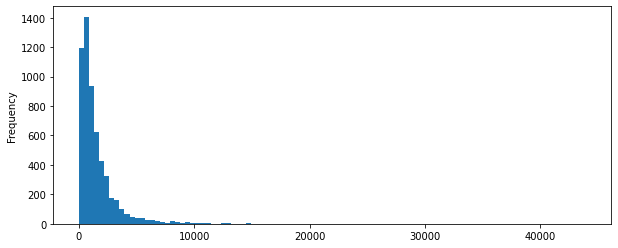

In [ ]:
df['length'].plot.hist(bins=100,figsize=(10,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c48ec2210>,
      dtype=object)

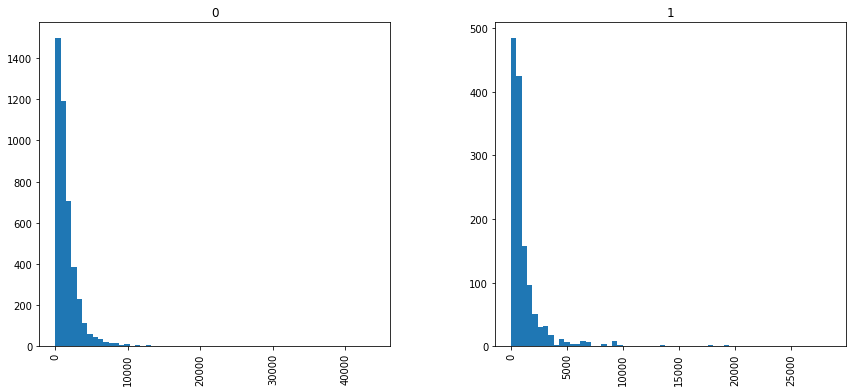

In [ ]:
df.hist(column='length',by='spam',bins=60,figsize=(14,6))

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Every mail starts with 'Subject :' will remove this from each text 
df['text']=df['text'].map(lambda text: text[1:])
df['text'] = df['text'].map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',str(text))).apply(lambda x: (x.lower()).split())
ps = PorterStemmer()
corpus=df['text'].apply(lambda text_list:' '.join(list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))


In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus.values).toarray()

print(len(cv.vocabulary_.keys()))

y = df.iloc[:, 1].values

29223


In [ ]:
# Using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
cv1 = TfidfVectorizer()
X1 = cv1.fit_transform(corpus.values).toarray()

print(len(cv.vocabulary_.keys()))

y1 = df.iloc[:, 1].values


29223


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2)

In [ ]:
# Fitting Naive Bayes classifier to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
classifier.fit(X_train , y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
classifier.fit(X_train1, y_train1)
y_pred1 = classifier.predict(X_test1)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm1 = confusion_matrix(y_test1, y_pred1)
print(cm)
print(cm1)

[[852   7]
 [  3 284]]
[[834   0]
 [136 176]]


In [ ]:
#this function computes subset accuracy
from sklearn.metrics import accuracy_score 
tp = accuracy_score(y_test, y_pred,normalize=False)
tp1 = accuracy_score(y_test1, y_pred1, normalize=False)
print(tp, ' / ', y_test.shape[0])
print(tp1, ' / ', y_test1.shape[0])

1136  /  1146
1010  /  1146


In [ ]:
from sklearn.metrics import classification_report, f1_score
print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9826989619377162
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       859
           1       0.98      0.99      0.98       287

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [ ]:
from sklearn.metrics import classification_report, f1_score
print(f1_score(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

0.7213114754098361
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       834
           1       1.00      0.56      0.72       312

    accuracy                           0.88      1146
   macro avg       0.93      0.78      0.82      1146
weighted avg       0.90      0.88      0.87      1146

